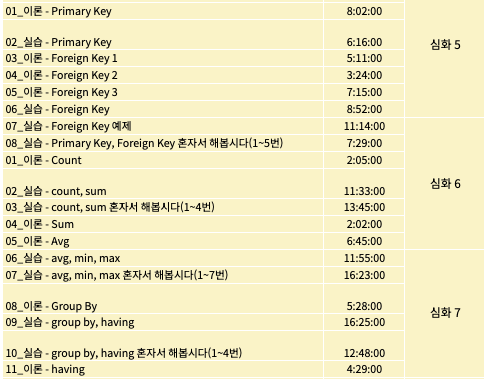

# 1. 심화 5 ~ 7

# 1. Primary KEY
- 테이블의 각 레코드를 식별
- 중복되지 않은 고유값을 포함
- NULL 값을 포함할 수 없음
- 테이블 당 하나의 기본키를 가짐

## 📍 PRIMARY KEY 생성 문법-1

In [ ]:
CREATE TABLE person(
    pid INT NOT NULL,
    name VARCHAR(16),
    age INT,
    sex CHAR,
    PRIMARY KEY (pid)
);

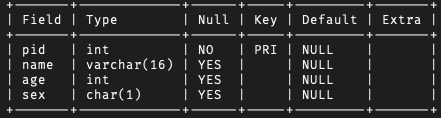

## 📍 여러개의 칼럼 기본키 설정

In [ ]:
# 여러개의 칼럼을 기본키로 설정하는 경우
CREATE TABLE animal(
    name VARCHAR(16) NOT NULL,
    type VARCHAR(16) NOT NULL,
    age INT,
    PRIMARY KEY (name, type)
);

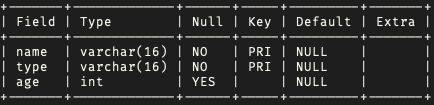

## 📍 PRIMARY KEY 삭제

In [ ]:
ALTER TABLE person
DROP PRIMARY KEY;

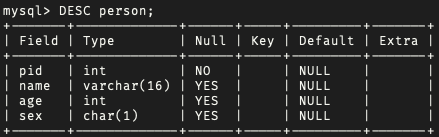

In [ ]:
# 여러개의 컬럼이여도 삭제는 동일
ALTER TABLE animal
DROP PRIMARY KEY

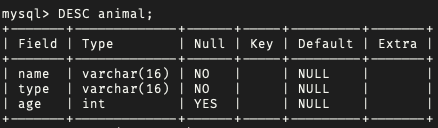

## 📍 PRIMARY KEY 생성 문법-2

In [ ]:
# 기본키 1개 설정
ALTER TABLE person
ADD PRIMARY KEY (pid);

# 기본키 여러개 설정
ALTER TABLE animal
ADD CONSTRAINT PK_animal PRIMARY KEY (name, type);

# 2. FOREIGN KEY (외래키)
- 한 테이블을 다른 테이블과 연결해주는 역할이며,
- 참조되는 테이블의 항목은 그 테이블의 기본키 (혹은 단일값)

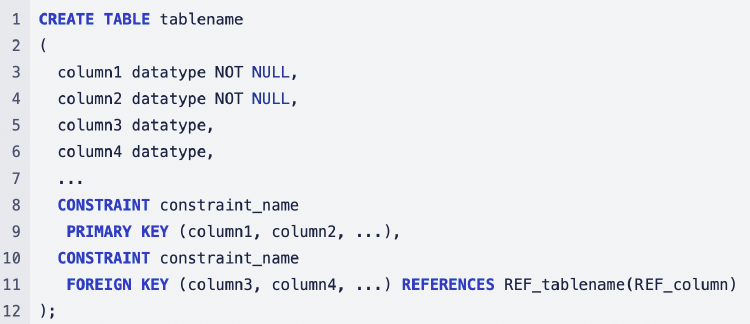

## 📍Table 생성 시 외래키 설정

In [ ]:
CREATE TABLE orders(
    oid INT NOT NULL,
    order_no VARCHAR(16),
    pid INT,
    PRIMARY KEY (oid),
    CONSTRAINT PK_person FOREIGN KEY (pid) REFERENCES person(pid)
);

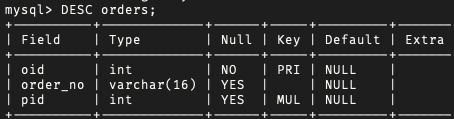

### CREATE TABLE 에서 FOREIGN KEY를 지정하는 경우, CONSTRAINT 를 생략할 수 있다.

In [ ]:
CREATE TABLE job(
    jid INT NOT NULL,
    name VARCHAR(16),
    pid INT,
    PRIMARY KEY (jid),
    FOREIGN KEY (pid) REFERENCES person(pid)
);

## 📍 자동 생성된 CONSTRAINT 를 확인하는 방법

In [ ]:
SHOW CREATE TABLE job;

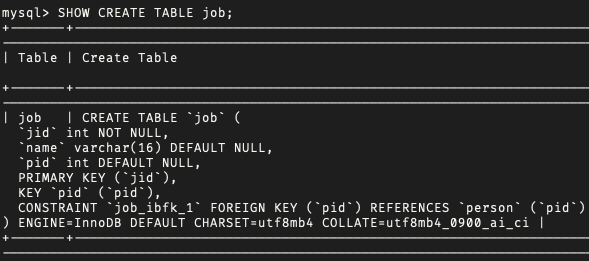

## 📍FOREIGN KEY 삭제 문법

In [ ]:
ALTER TABLE orders
DROP FOREIGN KEY PK_person;

### Table 이 생성된 이후에도 ALTER TABLE 을 통해 FOREIGN KEY 를 지정할 수 있다

In [ ]:
ALTER TABLE orders
ADD FOREIGN KEY (pid) REFERENCES person(pid);

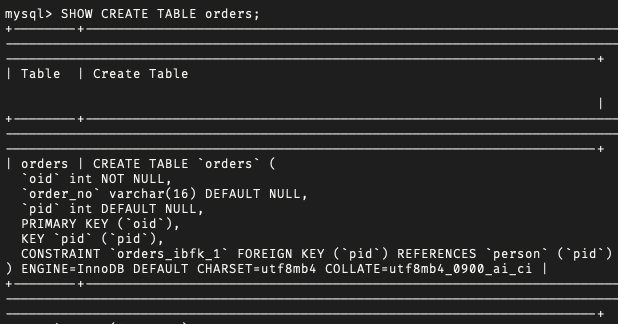

## 📍 예제

In [ ]:
# police_station 과 crime_status 테이블 사이에 관계 (Foreign Key)를 설정해 봅시다.
# AWS RDS(database-1) 의 zerobase 에서 작업합니다.

#### 경찰서 이름이 각 테이블에서 표시되는 형식이 다릅니다.

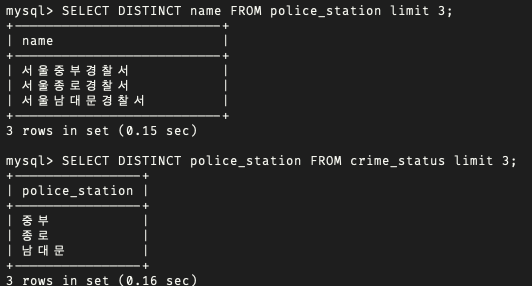

#### police_station에 name을 기본키로 설정.

In [ ]:
ALTER TABLE police_station
ADD PRIMARY KEY (name);

#### crime_status 테이블에 Foreign Key 로 사용할 Column 추가

In [ ]:
ALTER TABLE crime_status
ADD COLUMN reference VARCHAR(16);

#### crime_status에 외래키 생성.

In [ ]:
ALTER TABLE crime_status
ADD FOREIGN KEY (reference) REFERENCES police_station(name);

#### 외래키 값 넣기 (Update)

In [ ]:
UPDATE crime_status c, police_station p
SET c.reference = p.name
WHERE p.name LIKE CONCAT('서울', c.police_station, '경찰서');

#### 중복을 제거해서 crime_status에 잘 들어갔는지 확인

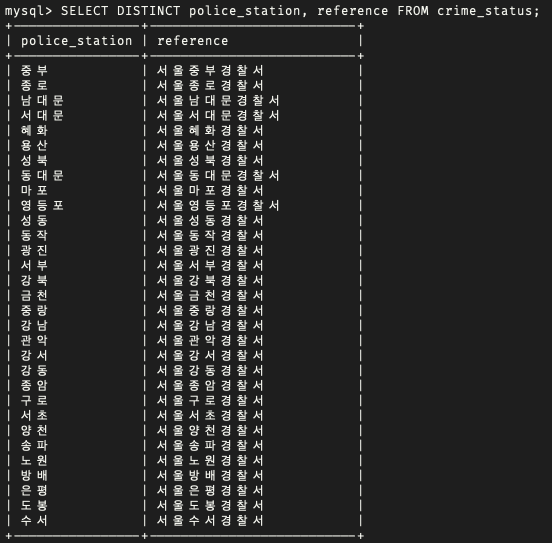

#### Foreign Key 를 기준으로 두 테이블을 연관시켜 검색할 수 있다.

In [ ]:
SELECT c.police_station, p.address
FROM crime_status c, police_station p
WHERE c.reference = p.name
GROUP BY c.police_station;

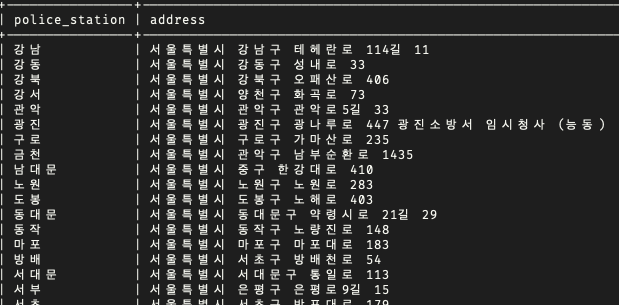

# 따라하기
1. 다음과 같이 study_id 가 PRIMARY KEY, patient_id 가 person 테이블의 pid 와 연결된
FOREIGN KEY 로 지정된 study 테이블을 생성하세요.


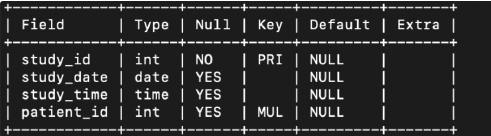

2. 생성한 테이블의 PRIMARY KEY 를 삭제하세요.
3. 생성한 테이블의 FOREIGN KEY 를 삭제하세요.
4. study 테이블의 patient_id 를 person 테이블의 pid 와 연결된 FOREIGN KEY 로 등록하세요.
5. study 테이블의 study_id 를 PRIMARY KEY로 등록하세요.

In [ ]:
# 1번
CREATE TABLE study(
    study_id INT NOT NULL,
    study_date DATE,
    study_time TIME,
    patient_id INT,
    PRIMARY KEY (study_id),
    FOREIGN KEY (patient_id) REFERENCES person(pid)
);

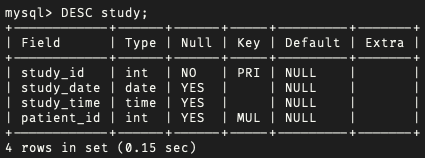

In [ ]:
# 2번
ALTER TABLE study
DROP PRIMARY KEY;

In [ ]:
# 3번
ALTER TABLE study
DROP FOREIGN KEY study_ibfk_1;

In [ ]:
# 4번
ALTER TABLE study
ADD FOREIGN KEY (patient_id) REFERENCES person(pid);

In [ ]:
# 5번
ALTER TABLE study
ADD PRIMARY KEY (study_id);

# 3. Aggregate Functions (집계함수)
- 여러 칼럼 혹은 테이블 전체 칼럼으로부터 하나의 결과값을 반환하는 함수
- SQL에서 여러 행의 데이터를 하나의 결과 값으로 요약하는 데 사용됩니다. 
- 이러한 함수는 주로 GROUP BY 절과 함께 사용되며, 데이터 분석과 보고에 매우 유용합니다.

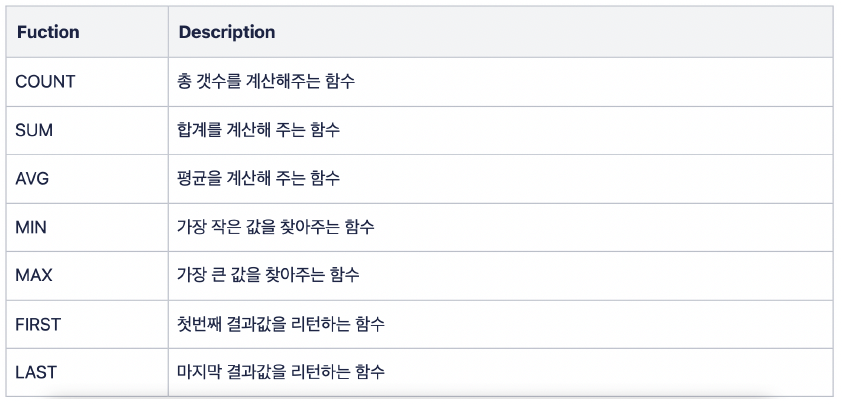

## 📍 COUNT
- COUNT(  ) 함수는 테이블의 행 수를 반환합니다.

In [ ]:
SELECT COUNT(*) FROM police_station;

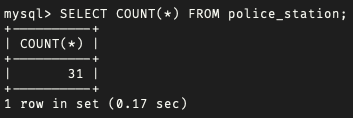

In [ ]:
SELECT COUNT(DISTINCT police_station) FROM crime_status;

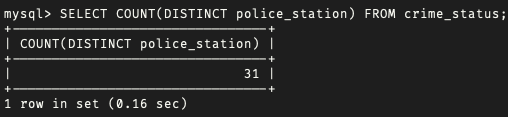

In [ ]:
# crime_type 은 총 몇 가지?
SELECT COUNT(DISTINCT crime_type) FROM crime_status;

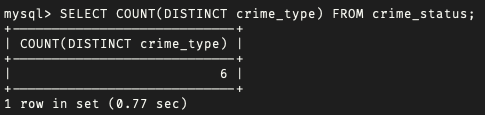

## 📍SUM
- SUM() 함수는 특정 열의 모든 값을 더합니다.

In [ ]:
# 범죄 총 발생건수는?
SELECT SUM(case_number) FROM crime_status
WHERE status_type = '발생';

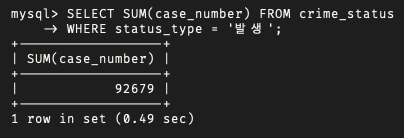

In [ ]:
# 살인의 총 발생건수는?
SELECT SUM(case_number) FROM crime_status
WHERE crime_type = '살인' AND status_type = '발생';

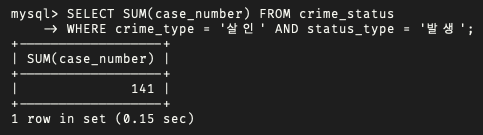

In [ ]:
# 중부 경찰서에서 검거된 총 범죄 건수는?
SELECT SUM(case_number) FROM crime_status
WHERE police_station = '중부' AND status_type = '검거';

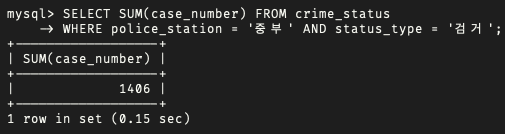

## 📍 예제

1. police_station 에서 경찰서는 총 몇개이고, 각각 경찰서 이름음 무엇인지 확인하세요.
2. crime_status 에서 status_type 은 총 몇개이고, 각각 타입은 무엇인지 확인하세요.
3. 종로경찰서와 남대문경찰서의 강도 발생 건수의 합을 구하세요.
4. 폭력 범죄의 검거 건수의 합을 구하세요.

In [ ]:
# 1번
SELECT COUNT(DISTINCT name) FROM police_station; 
SELECT DISTINCT name FROM police_station;

# 2번
SELECT COUNT(DISTINCT status_type) FROM crime_status;
SELECT DISTINCT status_type FROM crime_status;

# 3번
SELECT SUM(case_number) FROM crime_status
WHERE police_station IN ('종로', '남대문')
AND crime_type = '강도' AND status_type = '발생';

# 4번
SELECT SUM(case_number) FROM crime_status
WHERE crime_type = '폭력' AND status_type = '검거'

## 📍 AVG
- AVG(  ) 함수는 특정 열의 평균 값을 계산합니다. 

In [ ]:
# 평균 폭력 검거 건수는?
SELECT AVG(case_number) FROM crime_status
WHERE crime_type = '폭력' AND status_type = '검거';


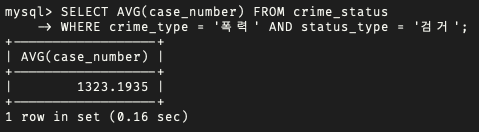

In [ ]:
# 중부경찰서 범죄 평균 발생 건수
SELECT AVG(case_number) FROM crime_status
WHERE police_station = '중부' AND status_type = '발생';

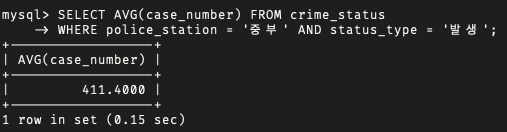

## 📍 MIN
- MIN() 함수는 특정 열의 최솟값을 찾아주는 함수.

In [2]:
# 강도 발생 건수가 가장 적은 경우 몇 건?
SELECT MIN(case_number) FROM crime_status
WHERE crime_type = '강도' AND status_type = '발생';

SyntaxError: invalid syntax (413682564.py, line 2)

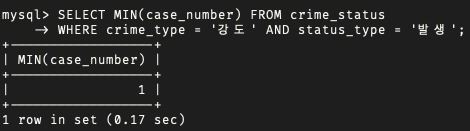

## 📍 MAX
- MAX() 함수는 특정 열의 최댓값을 찾아주는 함수.

In [ ]:
# 강남 경찰서에서 가장 많이 발생한 범죄 건수는?
SELECT MAX(case_number) FROM crime_status
WHERE police_station = '강남' AND status_type = '발생';

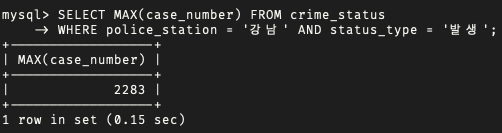

## 📍 GROUP BY 
- 그룹화하여 데이터를 조회를 한다.

In [ ]:
# crime_status 에서 경찰서별로 그룹화 하여 경찰서 이름을 조회
SELECT police_station FROM crime_status
GROUP BY police_station
ORDER BY police_station;

In [ ]:
# 경찰서 종류를 검색 - DISTINCT 를 사용하는 경우 (ORDER BY 를 사용할 수 없음)
SELECT DISTINCT police_station FROM crime_status;

In [ ]:
# 경찰서 별로 총 발생 범죄 건수를 검색
SELECT police_station, SUM(case_number) 발생건수 FROM crime_status
WHERE status_type = '발생'
GROUP BY police_station
ORDER BY 발생건수 DESC
LIMIT 5;

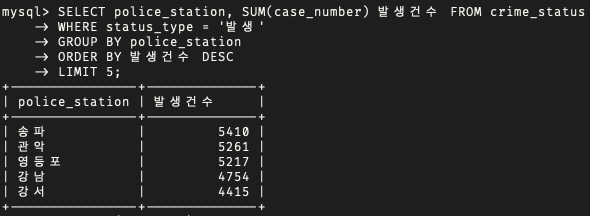

In [ ]:
# 경찰서 별로 평균 범죄 검거 건수를 검색
SELECT police_station, AVG(case_number) 평균검거건수 FROM crime_status
WHERE status_type = '검거'
GROUP BY police_station
ORDER BY 평균검거건수 DESC
limit 5;

## 📍 HAVING
- 조건에 집계함수가 포함되는 경우 WHERE 대신 HAVING 사용

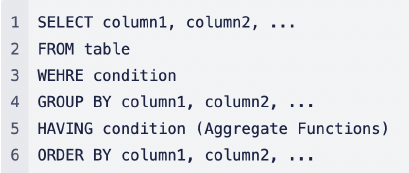

In [3]:
# 경찰서 별로 발생한 범죄 건수의 합이 4000 건보다 보다 큰 경우를 검색
SELECT police_station, SUM(case_number) FROM crime_status
WHERE status_type = '발생'
GROUP BY police_station
HAVING SUM(case_number) >= 4000; 

SyntaxError: invalid syntax (2203653604.py, line 2)

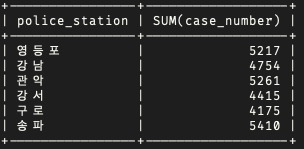

In [ ]:
# 경찰서 별로 발생한 폭력과 절도의 범죄 건수 평균이 2000 이상인 경우를 검색

SELECT police_station, AVG(case_number) FROM crime_status
WHERE crime_type IN ('폭력', '절도') AND status_type = '발생'
GROUP BY police_station
HAVING AVG(case_number) >= 2000;

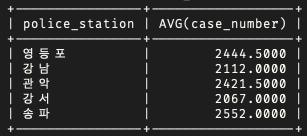

## 📍예제

In [ ]:
# '대문' 으로 끝나는 이름의 경찰서 별 범죄발생 건수의 평균이 500건 이상인 경우를 검색하세요.
SELECT police_station, AVG(case_number) FROM crime_status
WHERE police_station LIKE '%대문'
AND status_type = '발생'
GROUP BY police_station
HAVING AVG(case_number) >= 500;

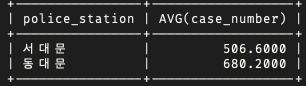